# 加载模块

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,color,data,filters,exposure,util

# 离散傅里叶变换

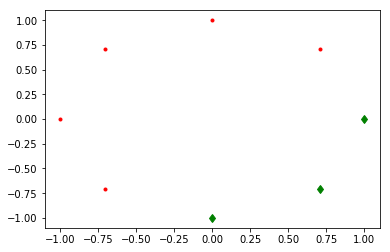

In [12]:
#复指数函数
M=8 # total number of point
u=1 # frequency
r=8 # current "time"
c=(np.exp(-2j*np.pi*u/M*np.array(range(r))))
plt.plot(np.real(c),np.imag(c),'.r')
r=3
c1=(np.exp(-2j*np.pi*u/M*np.array(range(r))))
plt.plot(np.real(c1),np.imag(c1),'dg')

<Container object of 3 artists>

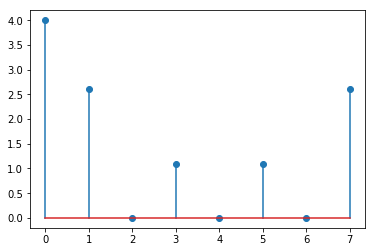

In [13]:
# 离散Fourier变换
t=np.array([1,1,1,1,0,0,0,0])
f=np.fft.fft(t)
#plt.bar(range(len(t)),t)
#plt.bar(range(len(t)),np.abs(f))
#plt.bar(range(len(t)),np.angle(f))
#plt.stem(range(len(t)),np.angle(f))
plt.stem(range(len(t)),np.abs(f))

In [27]:
# F(u)=F*(-u)
f1=f.copy()
f1[1:]=f[1:][::-1]
x=np.conj(f1)
np.abs(x-f).sum()

1.0805113201881733e-14

In [4]:
# f(t-tau)---> F(u)exp(-j2 pi u tau / M)
t=np.array([1,1,1,1,0,0,0,0])
t1=np.roll(t,-2)
f=np.fft.fft(t)
f1=np.fft.fft(t1)
f2=np.exp(1j*2*np.pi*np.array(range(8))/8*2)*f
np.abs(f1-f2).sum()

6.700043976526579e-15

In [18]:
# F(f(t)*g(t))=F(u)G(u)

t1=np.float64(np.array(range(8))<4)
t2=np.array([1,1,1])
np.abs(np.fft.ifft(np.fft.fft(t1)*np.fft.fft(t2,8)))
np.convolve(t1,t2)

array([1., 2., 3., 3., 2., 1., 0., 0., 0., 0.])

# 相关滤波

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  0.99060736,
        0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721,
        0.91294525,  0.83665564, -0.00885131, -0.8462204 , -0.90557836,
       -0.13235175,  0.76255845,  0.95637593,  0.27090579, -0.66363388,
       -0.98803162, -0.40403765])

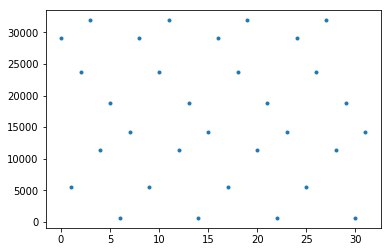

In [154]:
#t=np.random.rand(32)*2-1
t=np.sin(range(32))
p=np.abs(np.array([1,-1,1,-1,1,-1,1,-1]))
t[6:6+len(p)]=p.copy()
q1=np.convolve(t,p)

f1=np.fft.fft(t)
f2=np.fft.fft(p,32)
#q2=np.fft.ifft(f1/(0.001+np.abs(f1))*f2/(0.001+np.abs(f2)))
q2=np.fft.ifft(f1/(0.00001+f2))
plt.plot(np.abs(q2),'.')
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=uint8)

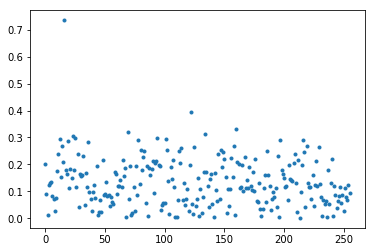

In [167]:
t=np.random.rand(256)
p=np.random.rand(128)
t[16:16+len(p)]=p.copy()
q1=np.convolve(t,p)

f1=np.fft.fft(t)
f2=np.fft.fft(p,len(t))
#q2=np.fft.ifft(f1/(0.001+np.abs(f1))*f2/(0.001+np.abs(f2)))
q2=np.fft.ifft(f1/(0.00001+f2))
plt.plot(np.abs(q2),'.')
np.uint8(q2[1:20]>0.7)

# 周期噪声

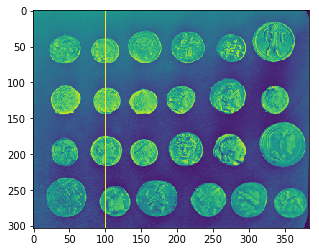

In [18]:
im=data.coins()
    
imf=np.fft.fft2(im)
a=50  # noise frequency
m=50  # noise amplitude
imf[0,a]=imf[0,a]*m
imf[a,0]=imf[a,0]*m
imf[a,a]=imf[a,a]*m
imf[imf.shape[0]-a,imf.shape[1]-a]=imf[imf.shape[0]-a,imf.shape[1]-a]*m
im1=np.uint8(np.abs(np.fft.ifft2(imf)))
#plt.plot((im1[:,100]))
im2=im.copy()
im2[:,100]=255;
plt.imshow(im2)
print()

# 周期噪声滤波

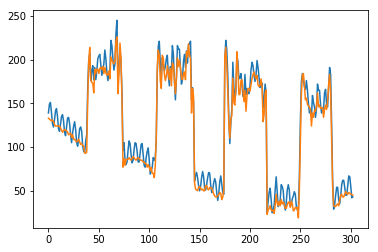

In [23]:
m=0
imf[0,a]=imf[0,a]*m
imf[a,0]=imf[a,0]*m
imf[a,a]=imf[a,a]*m
imf[imf.shape[0]-a,imf.shape[1]-a]=imf[imf.shape[0]-a,imf.shape[1]-a]*m
im2=np.uint8(np.abs(np.fft.ifft2(imf)))
#plt.imshow(im2)
plt.plot(im1[:,100])
plt.plot(im2[:,100])

# 幅值与相位

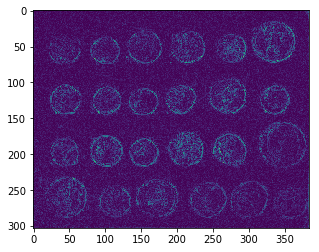

In [26]:
im=data.coins()
    
imf=np.fft.fft2(im)
amp=np.abs(imf)
phase=np.angle(imf)
    
onlyample=np.uint8(np.abs(np.fft.ifft2(amp)))
onlyphase=np.uint8(np.mean(amp)*np.abs(np.fft.ifft2(np.exp(1j*phase))))
#plt.imshow(onlyample)
plt.imshow(onlyphase)

# 傅里叶变换中心平移

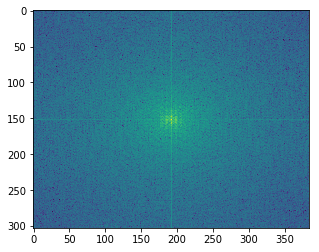

In [31]:
w,h=imf.shape
w2=np.uint8(w/2)
h2=np.uint8(h/2)
imf1=np.vstack((imf[w2:,:],imf[:w2,:]))
imf2=np.hstack((imf1[:,h2:],imf1[:,:h2]))
plt.imshow(np.log(np.abs(imf2)))

# 振铃效应

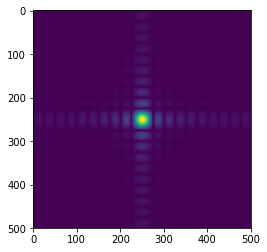

In [37]:
a=np.zeros((500,500),dtype=np.uint8)
a[245:255,245:255]=255
f=np.fft.ifft2(a)
f[10:490,:]=0
f[:,10:490]=0
a1=np.abs(np.fft.ifft2(f))
a1=np.uint8(a1*255/np.max(a1))
plt.imshow(a1)
#plt.plot(a[:,250])